# Explore feature correlations
### Correlated variables...
<ul>
    <li>...can distort feature importance values</li>
    <li>...can decrease model performance</li>
    <li>...can make models unnecessarily complex</li>
</ul>

## Read data

In [1]:
# Import libraries
import json
import re
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from scipy.stats import spearmanr

from src.visualization import varcorrelation as corplt

In [2]:
# Determine data source
data_path = "../data/interim/vtdata.pkl"
# Read pickle
data_df = pd.read_pickle(data_path)

In [3]:
# Subset feature matrix and target variables
vt_X = data_df.drop(columns="vt")
vt_y = data_df["vt"]

# Drop variables not included for predictions
vt_X_fit = vt_X.drop(['x', 'y', 'plot_id'], axis=1)

In [5]:
# Print columns and shape
print(vt_X_fit.shape)
vt_X_fit.columns

(22173, 94)


Index(['B11_median_comp_Sent2', 'B12_median_comp_Sent2',
       'B1_median_comp_Sent2', 'B2_median_comp_Sent2', 'B3_median_comp_Sent2',
       'B4_median_comp_Sent2', 'B5_median_comp_Sent2', 'B6_median_comp_Sent2',
       'B7_median_comp_Sent2', 'B8A_median_comp_Sent2', 'B8_median_comp_Sent2',
       'B9_median_comp_Sent2', 'EVI_greenest_pixel_Sent2',
       'EVI_median_comp_Sent2', 'GNDVI_greenest_pixel_Sent2',
       'GNDVI_median_comp_Sent2', 'NDMI_greenest_pixel_Sent2',
       'NDMI_median_comp_Sent2', 'NDVI_greenest_pixel_Sent2',
       'NDVI_median_comp_Sent2', 'SAVI_greenest_pixel_Sent2',
       'SAVI_median_comp_Sent2', 'B1_median_comp_Lands7',
       'B2_median_comp_Lands7', 'B3_median_comp_Lands7',
       'B4_median_comp_Lands7', 'B5_median_comp_Lands7',
       'B6_median_comp_Lands7', 'B7_median_comp_Lands7',
       'EVI_greenest_pixel_Lands7', 'EVI_median_comp_Lands7',
       'GNDVI_greenest_pixel_Lands7', 'GNDVI_median_comp_Lands7',
       'NDMI_greenest_pixel_Lands7', 'ND

---
---
---
## 1. Continuous features
### 1.1 Calculate Pearson's rho (rank correlation)

In [7]:
### Drop all categorical variables for spearman correlation
vt_X_cont = vt_X_fit.select_dtypes(exclude='category')
print(vt_X_cont.shape)
print(vt_X_cont.columns)

(22173, 84)
Index(['B11_median_comp_Sent2', 'B12_median_comp_Sent2',
       'B1_median_comp_Sent2', 'B2_median_comp_Sent2', 'B3_median_comp_Sent2',
       'B4_median_comp_Sent2', 'B5_median_comp_Sent2', 'B6_median_comp_Sent2',
       'B7_median_comp_Sent2', 'B8A_median_comp_Sent2', 'B8_median_comp_Sent2',
       'B9_median_comp_Sent2', 'EVI_greenest_pixel_Sent2',
       'EVI_median_comp_Sent2', 'GNDVI_greenest_pixel_Sent2',
       'GNDVI_median_comp_Sent2', 'NDMI_greenest_pixel_Sent2',
       'NDMI_median_comp_Sent2', 'NDVI_greenest_pixel_Sent2',
       'NDVI_median_comp_Sent2', 'SAVI_greenest_pixel_Sent2',
       'SAVI_median_comp_Sent2', 'B1_median_comp_Lands7',
       'B2_median_comp_Lands7', 'B3_median_comp_Lands7',
       'B4_median_comp_Lands7', 'B5_median_comp_Lands7',
       'B6_median_comp_Lands7', 'B7_median_comp_Lands7',
       'EVI_greenest_pixel_Lands7', 'EVI_median_comp_Lands7',
       'GNDVI_greenest_pixel_Lands7', 'GNDVI_median_comp_Lands7',
       'NDMI_greenest_pixel_

In [8]:
# Read variable dictionary
with open("../data/dict/predictors.json", 'r', encoding="utf8") as file:
        var_dict = json.load(file)

In [9]:
var_long_names = [x['long_name'] for x in var_dict.values()]

In [10]:
print(var_long_names)

['Easting', 'Northing', 'Plot ID', 'Sent2 - B1 (MED)', 'Sent2 - B2 (MED)', 'Sent2 - B3 (MED)', 'Sent2 - B4 (MED)', 'Sent2 - B5 (MED)', 'Sent2 - B6 (MED)', 'Sent2 - B7 (MED)', 'Sent2 - B8 (MED)', 'Sent2 - B8A (MED)', 'Sent2 - B9 (MED)', 'Sent2 - B11 (MED)', 'Sent2 - B12 (MED)', 'Sent2 - EVI (MED)', 'Sent2 - EVI (MVC)', 'Sent2 - GNDVI (MED)', 'Sent2 - GNDVI (MVC)', 'Sent2 - NDMI (MED)', 'Sent2 - NDMI (MVC)', 'Sent2 - NDVI (MED)', 'Sent2 - NDVI (MVC)', 'Sent2 - SAVI (MED)', 'Sent2 - SAVI (MVC)', 'Lands7 - B1 (MED)', 'Lands7 - B2 (MED)', 'Lands7 - B3 (MED)', 'Lands7 - B4 (MED)', 'Lands7 - B5 (MED)', 'Lands7 - B6 (MED)', 'Lands7 - B7 (MED)', 'Lands7 - EVI (MED)', 'Lands7 - EVI (MVC)', 'Lands7 - GNDVI (MED)', 'Lands7 - GNDVI (MVC)', 'Lands7 - NDMI (MED)', 'Lands7 - NDMI (MVC)', 'Lands7 - NDVI (MED)', 'Lands7 - NDVI (MVC)', 'Lands7 - SAVI (MED)', 'Lands7 - SAVI (MVC)', 'AR50 - LC types', 'AR50 - Forest productivity', 'AR50 - Forest types', 'AR50 - Veg. cover', 'CORINE - LC classes', 'Bed rock

### 2.1 Visualize cluster dendrogram and spearman correlation

In [11]:
# Shape?
vt_X_cont.shape

(22173, 84)

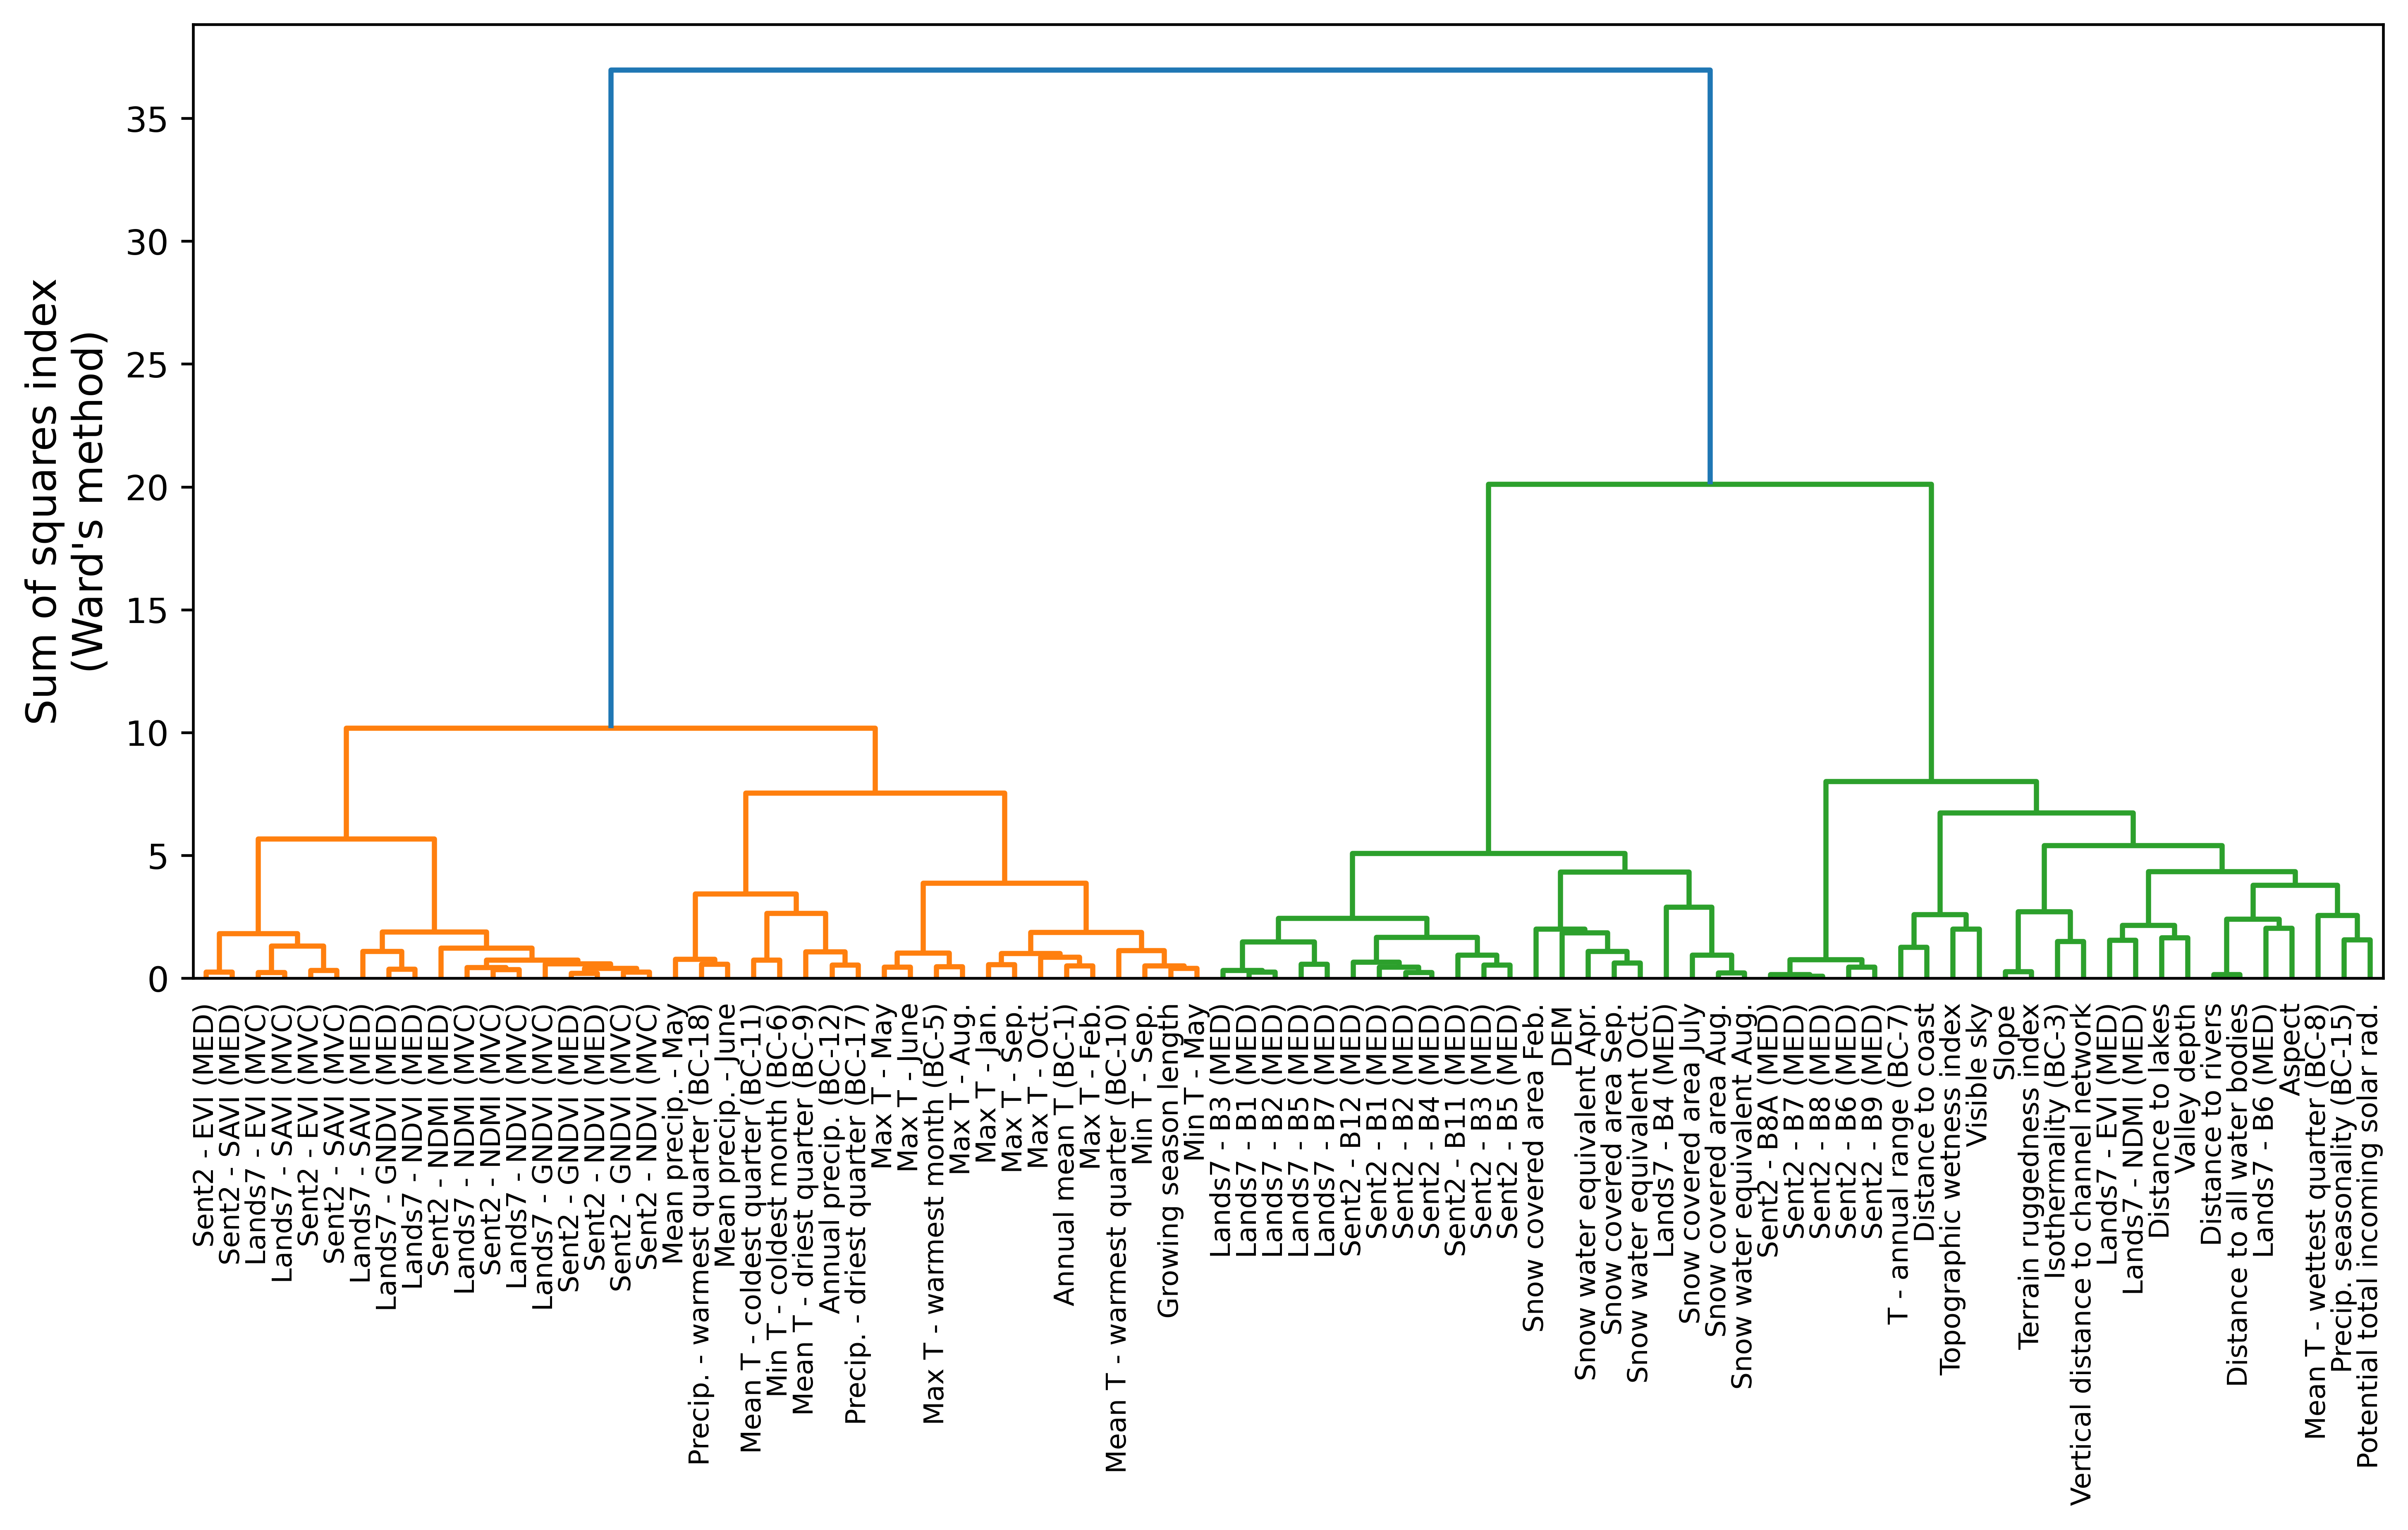

In [12]:
# Calculate spearman's rho (rank correlation)
feat_corr_spear = spearmanr(vt_X_cont).correlation

# Calculate Ward's linkage
feat_corr_ward_linkage = hierarchy.ward(feat_corr_spear)

# Plot dendrogram
_ = corplt.plot_dendrogram(
    vt_X_cont, 
    feat_corr_ward_linkage,
    figsize=(25/2.54, 16/2.54),
    save_as='dendrogram_wards_method.png'
)

---
## Spearman rho correlation

Group variables by category

In [34]:
correl_mat_label_dict = {
    "Sentinel-2": [x for x in vt_X_cont.columns if re.match('.*_sent2', x)],
    "Landsat-7": [x for x in vt_X_cont.columns if re.match('.*_land7', x)], 
    "Temperature": [
        'bioclim_1', 'bioclim_3', 'bioclim_5', 'bioclim_6', 'bioclim_7', 'bioclim_8', 'bioclim_9', 
        'bioclim_10', 'bioclim_11', 'growing_season_length', 'tmax_1', 'tmax_10', 'tmax_2', 
        'tmax_5', 'tmax_6', 'tmax_8', 'tmax_9', 'tmin_5', 'tmin_9'
    ],
    "Precipitation": [
        'bioclim_12', 'bioclim_15', 'bioclim_17', 'bioclim_18', 'precip_5', 'precip_6'
    ],
    "Snow": [
        'sca_2', 'sca_7', 'sca_8', 'sca_9', 'swe_4', 'swe_8', 'swe_10'
    ],
    "Topography": [
        'aspect', 'dem100', 'slope', 'terrain_ruggedness_index', 'topographic_wetness_index', 
        'total_insolation', 'valley_depth', 'visible_sky', 'vertical_distance_to_channel_network'
    ],
    "Hydrology": [
        'proxy_allrivers', 'proxy_allwater', 'proxy_coast', 'proxy_lakes'
    ]
}

In [36]:
# Check if all vars are included and create label list
labels = []
_ = [labels.extend(values) for values in correl_mat_label_dict.values()]

print(labels)

sum_labels = len(labels)
sum_vars = len(vt_X_cont.columns)

if sum_labels != sum_vars:
    _ = [print(f"Missing: {missing_var}") for missing_var in vt_X_cont.columns if missing_var not in labels]
else: 
    print("Done!")

['EVI_greenest_pixel_sent2', 'EVI_median_comp_sent2', 'GNDVI_greenest_pixel_sent2', 'GNDVI_median_comp_sent2', 'NDMI_greenest_pixel_sent2', 'NDMI_median_comp_sent2', 'NDVI_greenest_pixel_sent2', 'NDVI_median_comp_sent2', 'SAVI_greenest_pixel_sent2', 'SAVI_median_comp_sent2', 'EVI_greenest_pixel_land7', 'EVI_median_comp_land7', 'GNDVI_greenest_pixel_land7', 'GNDVI_median_comp_land7', 'NDMI_greenest_pixel_land7', 'NDMI_median_comp_land7', 'NDVI_greenest_pixel_land7', 'NDVI_median_comp_land7', 'SAVI_greenest_pixel_land7', 'SAVI_median_comp_land7', 'bioclim_1', 'bioclim_3', 'bioclim_5', 'bioclim_6', 'bioclim_7', 'bioclim_8', 'bioclim_9', 'bioclim_10', 'bioclim_11', 'growing_season_length', 'tmax_1', 'tmax_10', 'tmax_2', 'tmax_5', 'tmax_6', 'tmax_8', 'tmax_9', 'tmin_5', 'tmin_9', 'bioclim_12', 'bioclim_15', 'bioclim_17', 'bioclim_18', 'precip_5', 'precip_6', 'sca_2', 'sca_7', 'sca_8', 'sca_9', 'swe_4', 'swe_8', 'swe_10', 'aspect', 'dem100', 'slope', 'terrain_ruggedness_index', 'topographic_

### Create new sorted DataFrame

In [39]:
vt_X_cont_grouped_df = vt_X_cont[labels]
vt_X_cont_grouped_df.head()

EVI_greenest_pixel_sent2  EVI_median_comp_sent2  \
0                   0.42104                0.40741   
1                   0.32259                0.21399   
2                   0.53046                0.40952   
3                   0.39231                0.35937   
4                   0.51686                0.48097   

   GNDVI_greenest_pixel_sent2  GNDVI_median_comp_sent2  \
0                     0.70197                  0.66032   
1                     0.49835                  0.35603   
2                     0.74365                  0.64169   
3                     0.70110                  0.65911   
4                     0.73059                  0.67669   

   NDMI_greenest_pixel_sent2  NDMI_median_comp_sent2  \
0                    0.31809                 0.14336   
1                   -0.12114                -0.10915   
2                    0.23448                 0.05201   
3                    0.08476                 0.01571   
4                    0.35250                 0.26084   

   NDVI_greenest_pixel_sent2  NDVI_median_comp_sent2  \
0                    0.74461                 0.67911   
1                    0.49299                 0.32801   
2                    0.81882                 0.64626   
3                    0.72667                 0.65315   
4                    0.84099                 0.75405   

   SAVI_greenest_pixel_sent2  SAVI_median_comp_sent2  ...  \
0                    0.40767                 0.38994  ...   
1                    0.29684                 0.19542  ...   
2                    0.50000                 0.38493  ...   
3                    0.39671                 0.36602  ...   
4                    0.49648                 0.43668  ...   

   terrain_ruggedness_index  topographic_wetness_index  total_insolation  \
0                    3.0000                     8.2101        1073.48169   
1                   29.2147                     6.2690        1098.24207   
2                    4.1833                     9.0169        1252.09399   
3                    1.8028                    13.6913        1003.45587   
4                    9.2466                     6.7679        1339.04956   

   valley_depth  visible_sky  vertical_distance_to_channel_network  \
0     415.43869      94.2645                               7.57320   
1     150.87869      91.0748                             317.84091   
2     105.67400      97.3012                              38.37750   
3      50.75290      97.3278                              55.44080   
4     298.20831      94.7297                              42.13300   

   proxy_allrivers  proxy_allwater  proxy_coast  proxy_lakes  
0        141.42136       141.42136  34084.60156   3087.06982  
1        500.00000       500.00000  71976.73438   1118.03394  
2        141.42136       141.42136  96457.08594   1063.01453  
3        412.31058       100.00000  26732.75195    100.00000  
4        412.31058       412.31058  38782.72656   1886.79626  

[5 rows x 65 columns]

In [14]:
vt_X_grouped_corr_df = vt_X_cont.corr(method='spearman', min_periods=1)
vt_X_grouped_corr_df

B11_median_comp_Sent2  \
B11_median_comp_Sent2                              1.000000   
B12_median_comp_Sent2                              0.953612   
B1_median_comp_Sent2                               0.703109   
B2_median_comp_Sent2                               0.777693   
B3_median_comp_Sent2                               0.792383   
...                                                     ...   
topographic_wetness_index                         -0.059579   
total_insolation                                  -0.162302   
valley_depth                                      -0.155922   
vertical_distance_to_channel_network               0.228132   
visible_sky                                        0.049367   

                                      B12_median_comp_Sent2  \
B11_median_comp_Sent2                              0.953612   
B12_median_comp_Sent2                              1.000000   
B1_median_comp_Sent2                               0.792821   
B2_median_comp_Sent2                               0.871025   
B3_median_comp_Sent2                               0.849152   
...                                                     ...   
topographic_wetness_index                         -0.083303   
total_insolation                                  -0.146281   
valley_depth                                      -0.171586   
vertical_distance_to_channel_network               0.265288   
visible_sky                                        0.039385   

                                      B1_median_comp_Sent2  \
B11_median_comp_Sent2                             0.703109   
B12_median_comp_Sent2                             0.792821   
B1_median_comp_Sent2                              1.000000   
B2_median_comp_Sent2                              0.899733   
B3_median_comp_Sent2                              0.834539   
...                                                    ...   
topographic_wetness_index                        -0.130890   
total_insolation                                 -0.200635   
valley_depth                                     -0.168629   
vertical_distance_to_channel_network              0.317537   
visible_sky                                       0.023780   

                                      B2_median_comp_Sent2  \
B11_median_comp_Sent2                             0.777693   
B12_median_comp_Sent2                             0.871025   
B1_median_comp_Sent2                              0.899733   
B2_median_comp_Sent2                              1.000000   
B3_median_comp_Sent2                              0.952871   
...                                                    ...   
topographic_wetness_index                        -0.106115   
total_insolation                                 -0.201043   
valley_depth                                     -0.156327   
vertical_distance_to_channel_network              0.294928   
visible_sky                                       0.020538   

                                      B3_median_comp_Sent2  \
B11_median_comp_Sent2                             0.792383   
B12_median_comp_Sent2                             0.849152   
B1_median_comp_Sent2                              0.834539   
B2_median_comp_Sent2                              0.952871   
B3_median_comp_Sent2                              1.000000   
...                                                    ...   
topographic_wetness_index                        -0.125079   
total_insolation                                 -0.228487   
valley_depth                                     -0.095394   
vertical_distance_to_channel_network              0.314969   
visible_sky                                      -0.054479   

                                      B4_median_comp_Sent2  \
B11_median_comp_Sent2                             0.808134   
B12_median_comp_Sent2                             0.896770   
B1_median_comp_Sent2                              0.860199   
B2_median_comp_Sent2                     

---
### Plot heatmap

In [41]:
from importlib import reload
reload(corplt)

<module 'src.visualization.varcorrelation' from 'c:\\git_repos\\dm-vegetation-types-norway\\src\\visualization\\varcorrelation.py'>

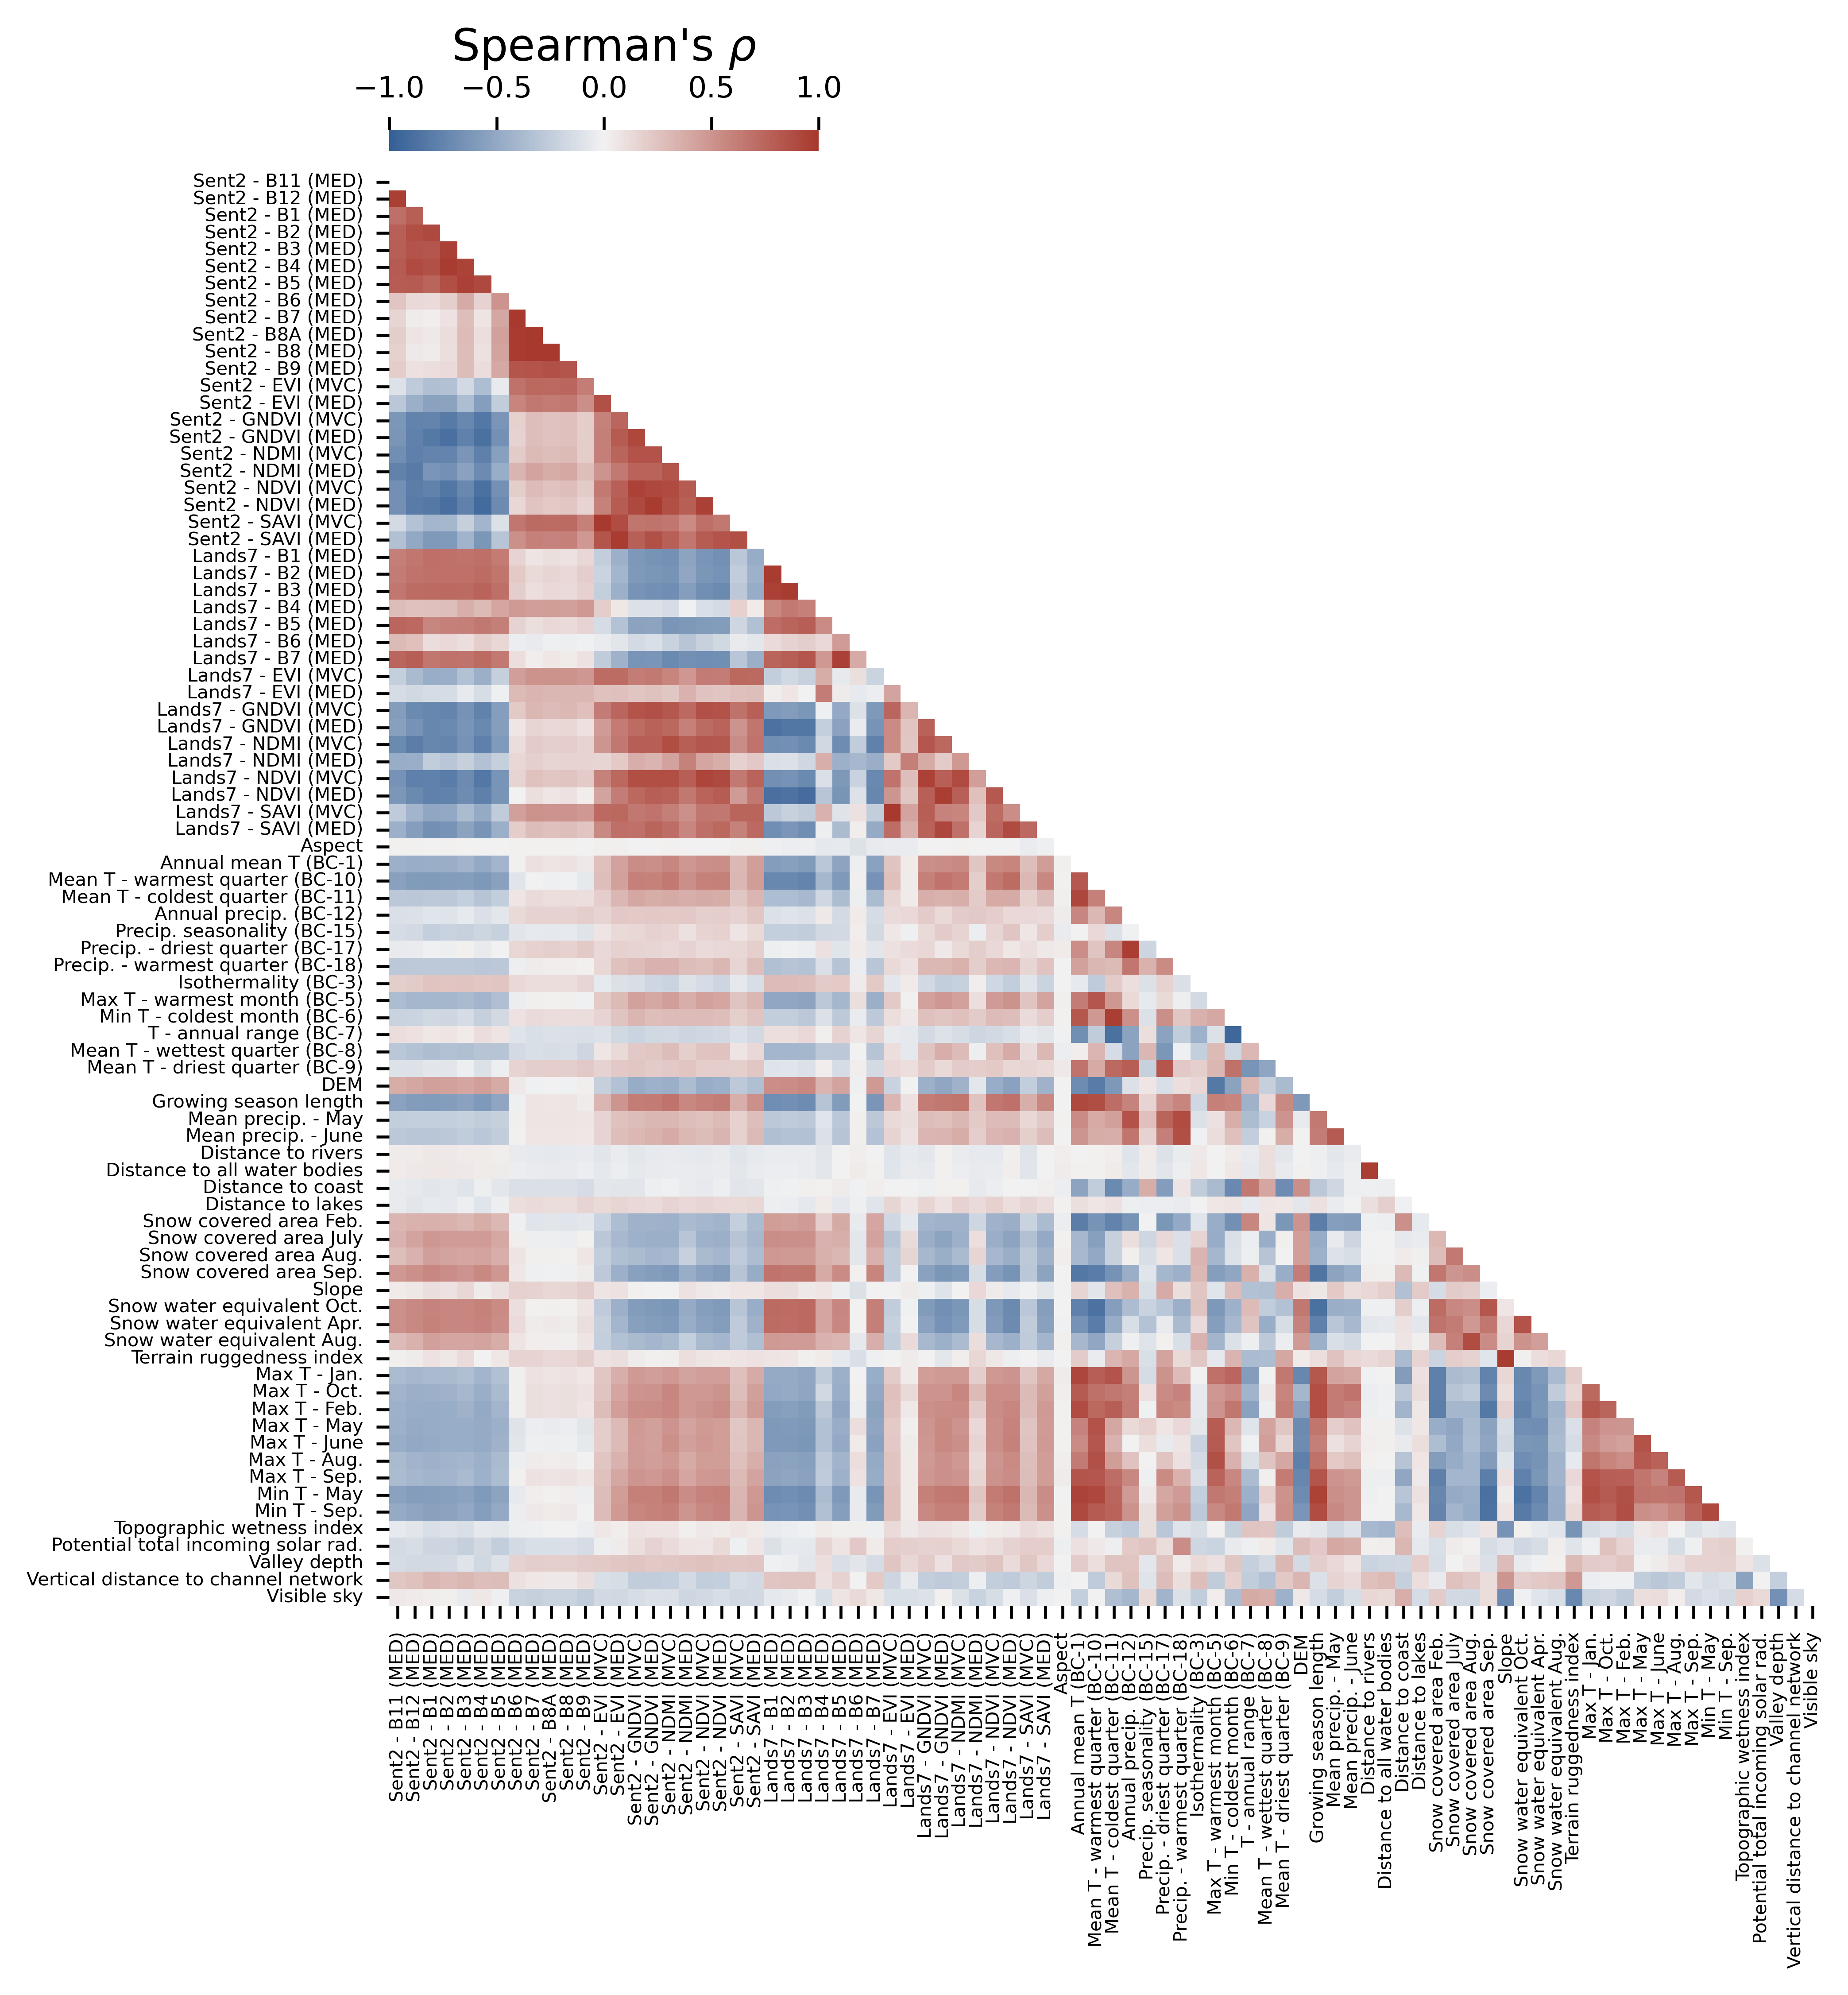

In [15]:
_ = corplt.plot_spearman_heatmap(
    vt_X_grouped_corr_df, 
    figsize=(18/2.54, 24/2.54),
    save_as='rank_correl_heatmap.png'
)

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#plt.style.use("../src/visualization/mplstyles/paper.mplstyle")

In [ ]:
# Create a mask to hide redundant values (upper half of matrix)
mask = np.triu(np.ones_like(vt_X_grouped_corr_df, dtype=bool), k=0)

In [ ]:
print(mask)

In [ ]:
# Create a custom diverging color palette
cmap_heatmap = sns.diverging_palette(250, 15, s=75, l=40,  n=12, center="light", as_cmap=True)

In [ ]:
fig, ax = plt.subplots(figsize=(3.54, 3.54), dpi=600)

ax = sns.heatmap(vt_X_grouped_corr_df, mask=mask, center=0, annot=False,
                 fmt='.2f', square=True, cmap=cmap_heatmap, 
                 cbar_kws={'label': r"Spearman's $\rho$",
                           "shrink": 0.5},
                 yticklabels=False, xticklabels=False)

cbar_ax = ax.figure.axes[-1]
cbar_ax.tick_params(labelsize=6)
plt.setp(cbar_ax.get_yticklabels(), rotation=0, ha="left",
         rotation_mode="anchor", fontsize=5)


len_label_groups = [len(grp) for grp in correl_mat_label_dict.values()]#ax.get_xticks()

grouped_xtick_bounds = []
grouped_xticks = []

for idx,len_ in enumerate(len_label_groups):
    if len(grouped_xtick_bounds) == 0:
        grouped_xtick_bounds.append(len_)
        grouped_xticks.append(len_/2)
    else:
        grouped_xtick_bounds.append(grouped_xtick_bounds[idx-1] + len_)
        grouped_xticks.append(grouped_xtick_bounds[idx-1] + (len_/2))#len_/2)

ax.set_xticks(grouped_xticks)
ax.set_yticks(grouped_xticks)

ax.set_yticklabels(correl_mat_label_dict.keys())
ax.set_xticklabels(correl_mat_label_dict.keys())


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor", fontsize=6)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor", fontsize=6)


### Set additional tick parameters
ax.tick_params(axis='both', which='both', 
               bottom=False, top=False, left=False, right=False,
               labelbottom=True, labelleft=True)



grouped_xtick_bounds = [0] + grouped_xtick_bounds
annot_size = 2
offset = 0.8
tick_len = offset * 4

arrw_offset = ((offset+tick_len)/2)-offset

### Define arrow style
arrow_style_dic = dict(arrowstyle='<->', facecolor='red',
                       shrinkA=0.3, shrinkB=0.3, linewidth=0.8)


for idx,group_bounds in enumerate(grouped_xtick_bounds):
    
    if idx+1 < len(grouped_xtick_bounds):
        
        '''
        Draw ticks at boundaries.
        '''
        ### Draw additional tick
        ax.annotate('', size=annot_size, fontweight='normal',
                    xy=(grouped_xtick_bounds[idx], len(labels) - offset),
                    xytext=(grouped_xtick_bounds[idx], len(labels) + tick_len),
                    arrowprops=dict(arrowstyle='-', facecolor='red', linewidth=0.8),
                    annotation_clip=False, ha='center')
        
        ### Draw additional tick
        ax.annotate('', size=annot_size, fontweight='normal',
                    xy=(-tick_len, grouped_xtick_bounds[idx]),
                    xytext=(offset, grouped_xtick_bounds[idx]),
                    arrowprops=dict(arrowstyle='-', facecolor='red', linewidth=0.8),
                    annotation_clip=False, ha='center')
        
        
        '''
        Draw arrows between boundaries.
        '''
        ### X axis arrows
        ax.annotate('', size=annot_size, fontweight='normal',
                    xy=(grouped_xtick_bounds[idx], len(labels) + arrw_offset),
                    xytext=(grouped_xtick_bounds[idx+1], len(labels) + arrw_offset),
                    arrowprops=arrow_style_dic,
                    annotation_clip=False, ha='center')
        
        ### Y axis arrows
        ax.annotate('', size=annot_size, fontweight='normal',
                    xy=(-arrw_offset, grouped_xtick_bounds[idx]),#, len(labels)+0.5),
                    xytext=(-arrw_offset, grouped_xtick_bounds[idx+1]),#, len(labels)+0.5),
                    arrowprops=arrow_style_dic,
                    annotation_clip=False, ha='center')
    else:

        ### Draw final tick
        ax.annotate('', size=annot_size, fontweight='normal',
                    xy=(len(labels), len(labels)-offset),
                    xytext=(len(labels), len(labels)+tick_len),
                    arrowprops=dict(arrowstyle='-', facecolor='red', linewidth=0.8),
                    annotation_clip=False, ha='center')
        
        ### Draw additional tick
        ax.annotate('', size=annot_size, fontweight='normal',
                    xy=(offset, len(labels)),
                    xytext=(-tick_len, len(labels)),
                    arrowprops=dict(arrowstyle='-', facecolor='red', linewidth=0.8),
                    annotation_clip=False, ha='center')

fig.tight_layout()
fig.savefig("../results/plots/features/correlation/Spearman_heatmap_cont.png")

In [ ]:
# Plot as full heatmap with variable names included
save = "Spearman_heatmap_scaled.png"
feat_heatmap = ftplt.plot_spearman_heatmap(feat_dendro, feat_corr_spear, figsize=(8, 8), saveas=save)

---
---
---
## 2. Categorical features
### 2.1 Calculate Cramers V (categorial-categorial association)

Calculates Cramers V statistic for categorial-categorial association in the corrected form as proposed by <a href="https://doi.org/10.1016/j.jkss.2012.10.002">Bergsma and Wicher (2013)</a>.</br>
See https://www.spss-tutorials.com/cramers-v-what-and-why/.

In [44]:
from src.features import correlation as corhlp

In [45]:
# Extract cat. features
vt_X_cat = vt_X_fit.select_dtypes(include='category')
vt_X_cat.columns

Index(['ar50_artype', 'ar50_skogbon', 'ar50_treslag', 'ar50_veg',
       'corine_lc_2012', 'geo_berggrunn', 'geo_grunnvann', 'geo_infiltr_evne',
       'geo_losmasse', 'geology_norge'],
      dtype='object')

In [57]:
# Create empty result pd.DataFrame
cramers_v_mat = pd.DataFrame(columns=vt_X_cat.columns, index=vt_X_cat.columns)

In [58]:
# Print for testing
cramers_v_mat

ar50_artype ar50_skogbon ar50_treslag ar50_veg  \
ar50_artype              NaN          NaN          NaN      NaN   
ar50_skogbon             NaN          NaN          NaN      NaN   
ar50_treslag             NaN          NaN          NaN      NaN   
ar50_veg                 NaN          NaN          NaN      NaN   
corine_lc_2012           NaN          NaN          NaN      NaN   
geo_berggrunn            NaN          NaN          NaN      NaN   
geo_grunnvann            NaN          NaN          NaN      NaN   
geo_infiltr_evne         NaN          NaN          NaN      NaN   
geo_losmasse             NaN          NaN          NaN      NaN   
geology_norge            NaN          NaN          NaN      NaN   

                 corine_lc_2012 geo_berggrunn geo_grunnvann geo_infiltr_evne  \
ar50_artype                 NaN           NaN           NaN              NaN   
ar50_skogbon                NaN           NaN           NaN              NaN   
ar50_treslag                NaN           NaN           NaN              NaN   
ar50_veg                    NaN           NaN           NaN              NaN   
corine_lc_2012              NaN           NaN           NaN              NaN   
geo_berggrunn               NaN           NaN           NaN              NaN   
geo_grunnvann               NaN           NaN           NaN              NaN   
geo_infiltr_evne            NaN           NaN           NaN              NaN   
geo_losmasse                NaN           NaN           NaN              NaN   
geology_norge               NaN           NaN           NaN              NaN   

                 geo_losmasse geology_norge  
ar50_artype               NaN           NaN  
ar50_skogbon              NaN           NaN  
ar50_treslag              NaN           NaN  
ar50_veg                  NaN           NaN  
corine_lc_2012            NaN           NaN  
geo_berggrunn             NaN           NaN  
geo_grunnvann             NaN           NaN  
geo_infiltr_evne          NaN           NaN  
geo_losmasse              NaN           NaN  
geology_norge             NaN           NaN

In [59]:
# Fill the result matrix (Cramers V corrected)
for cur_var_label in vt_X_cat.columns:
    
    # Add 1 to self association
    cramers_v_mat.loc[cur_var_label, cur_var_label] = 1
    
    cur_var_values = vt_X_cat[cur_var_label].values
    
    # Retain other variables to loop through
    other_vars_df = vt_X_cat.drop(labels=cur_var_label, axis=1)
    
    for other_var_label in other_vars_df.columns:
        
        other_var_values = other_vars_df[other_var_label]
        
        # Calculate confusion matrix between current variables
        cur_confusion_mat = pd.crosstab(cur_var_values, other_var_values)
        
        cramers_v_mat.loc[other_var_label, cur_var_label] = corhlp.cramers_corrected_stat(cur_confusion_mat)

In [60]:
# Print results
cramers_v_mat

ar50_artype ar50_skogbon ar50_treslag ar50_veg  \
ar50_artype                1        0.466        0.618    0.408   
ar50_skogbon           0.466            1        0.596    0.401   
ar50_treslag           0.618        0.596            1    0.391   
ar50_veg               0.408        0.401        0.391        1   
corine_lc_2012         0.562        0.465        0.574    0.607   
geo_berggrunn          0.126        0.166        0.162    0.163   
geo_grunnvann          0.091        0.127        0.116    0.087   
geo_infiltr_evne       0.106        0.129        0.114    0.094   
geo_losmasse           0.253        0.237         0.21    0.235   
geology_norge          0.054        0.043        0.068    0.066   

                 corine_lc_2012 geo_berggrunn geo_grunnvann geo_infiltr_evne  \
ar50_artype               0.562         0.126         0.091            0.106   
ar50_skogbon              0.465         0.166         0.127            0.129   
ar50_treslag              0.574         0.162         0.116            0.114   
ar50_veg                  0.607         0.163         0.087            0.094   
corine_lc_2012                1         0.128         0.133             0.14   
geo_berggrunn             0.128             1         0.183            0.175   
geo_grunnvann             0.133         0.183             1            0.992   
geo_infiltr_evne           0.14         0.175         0.992                1   
geo_losmasse               0.25         0.128          0.82            0.856   
geology_norge             0.123         0.916          0.05            0.064   

                 geo_losmasse geology_norge  
ar50_artype             0.253         0.054  
ar50_skogbon            0.237         0.043  
ar50_treslag             0.21         0.068  
ar50_veg                0.235         0.066  
corine_lc_2012           0.25         0.123  
geo_berggrunn           0.128         0.916  
geo_grunnvann            0.82          0.05  
geo_infiltr_evne        0.856         0.064  
geo_losmasse                1         0.141  
geology_norge           0.141             1

#### Save results in csv table.

In [66]:
# Save result as csv
cramers_v_mat.to_csv('../results/tables/categorical_vars_cramer_v.csv', index=True)

### Plot associations

In [67]:
from src.visualization import varcorrelation as corplt

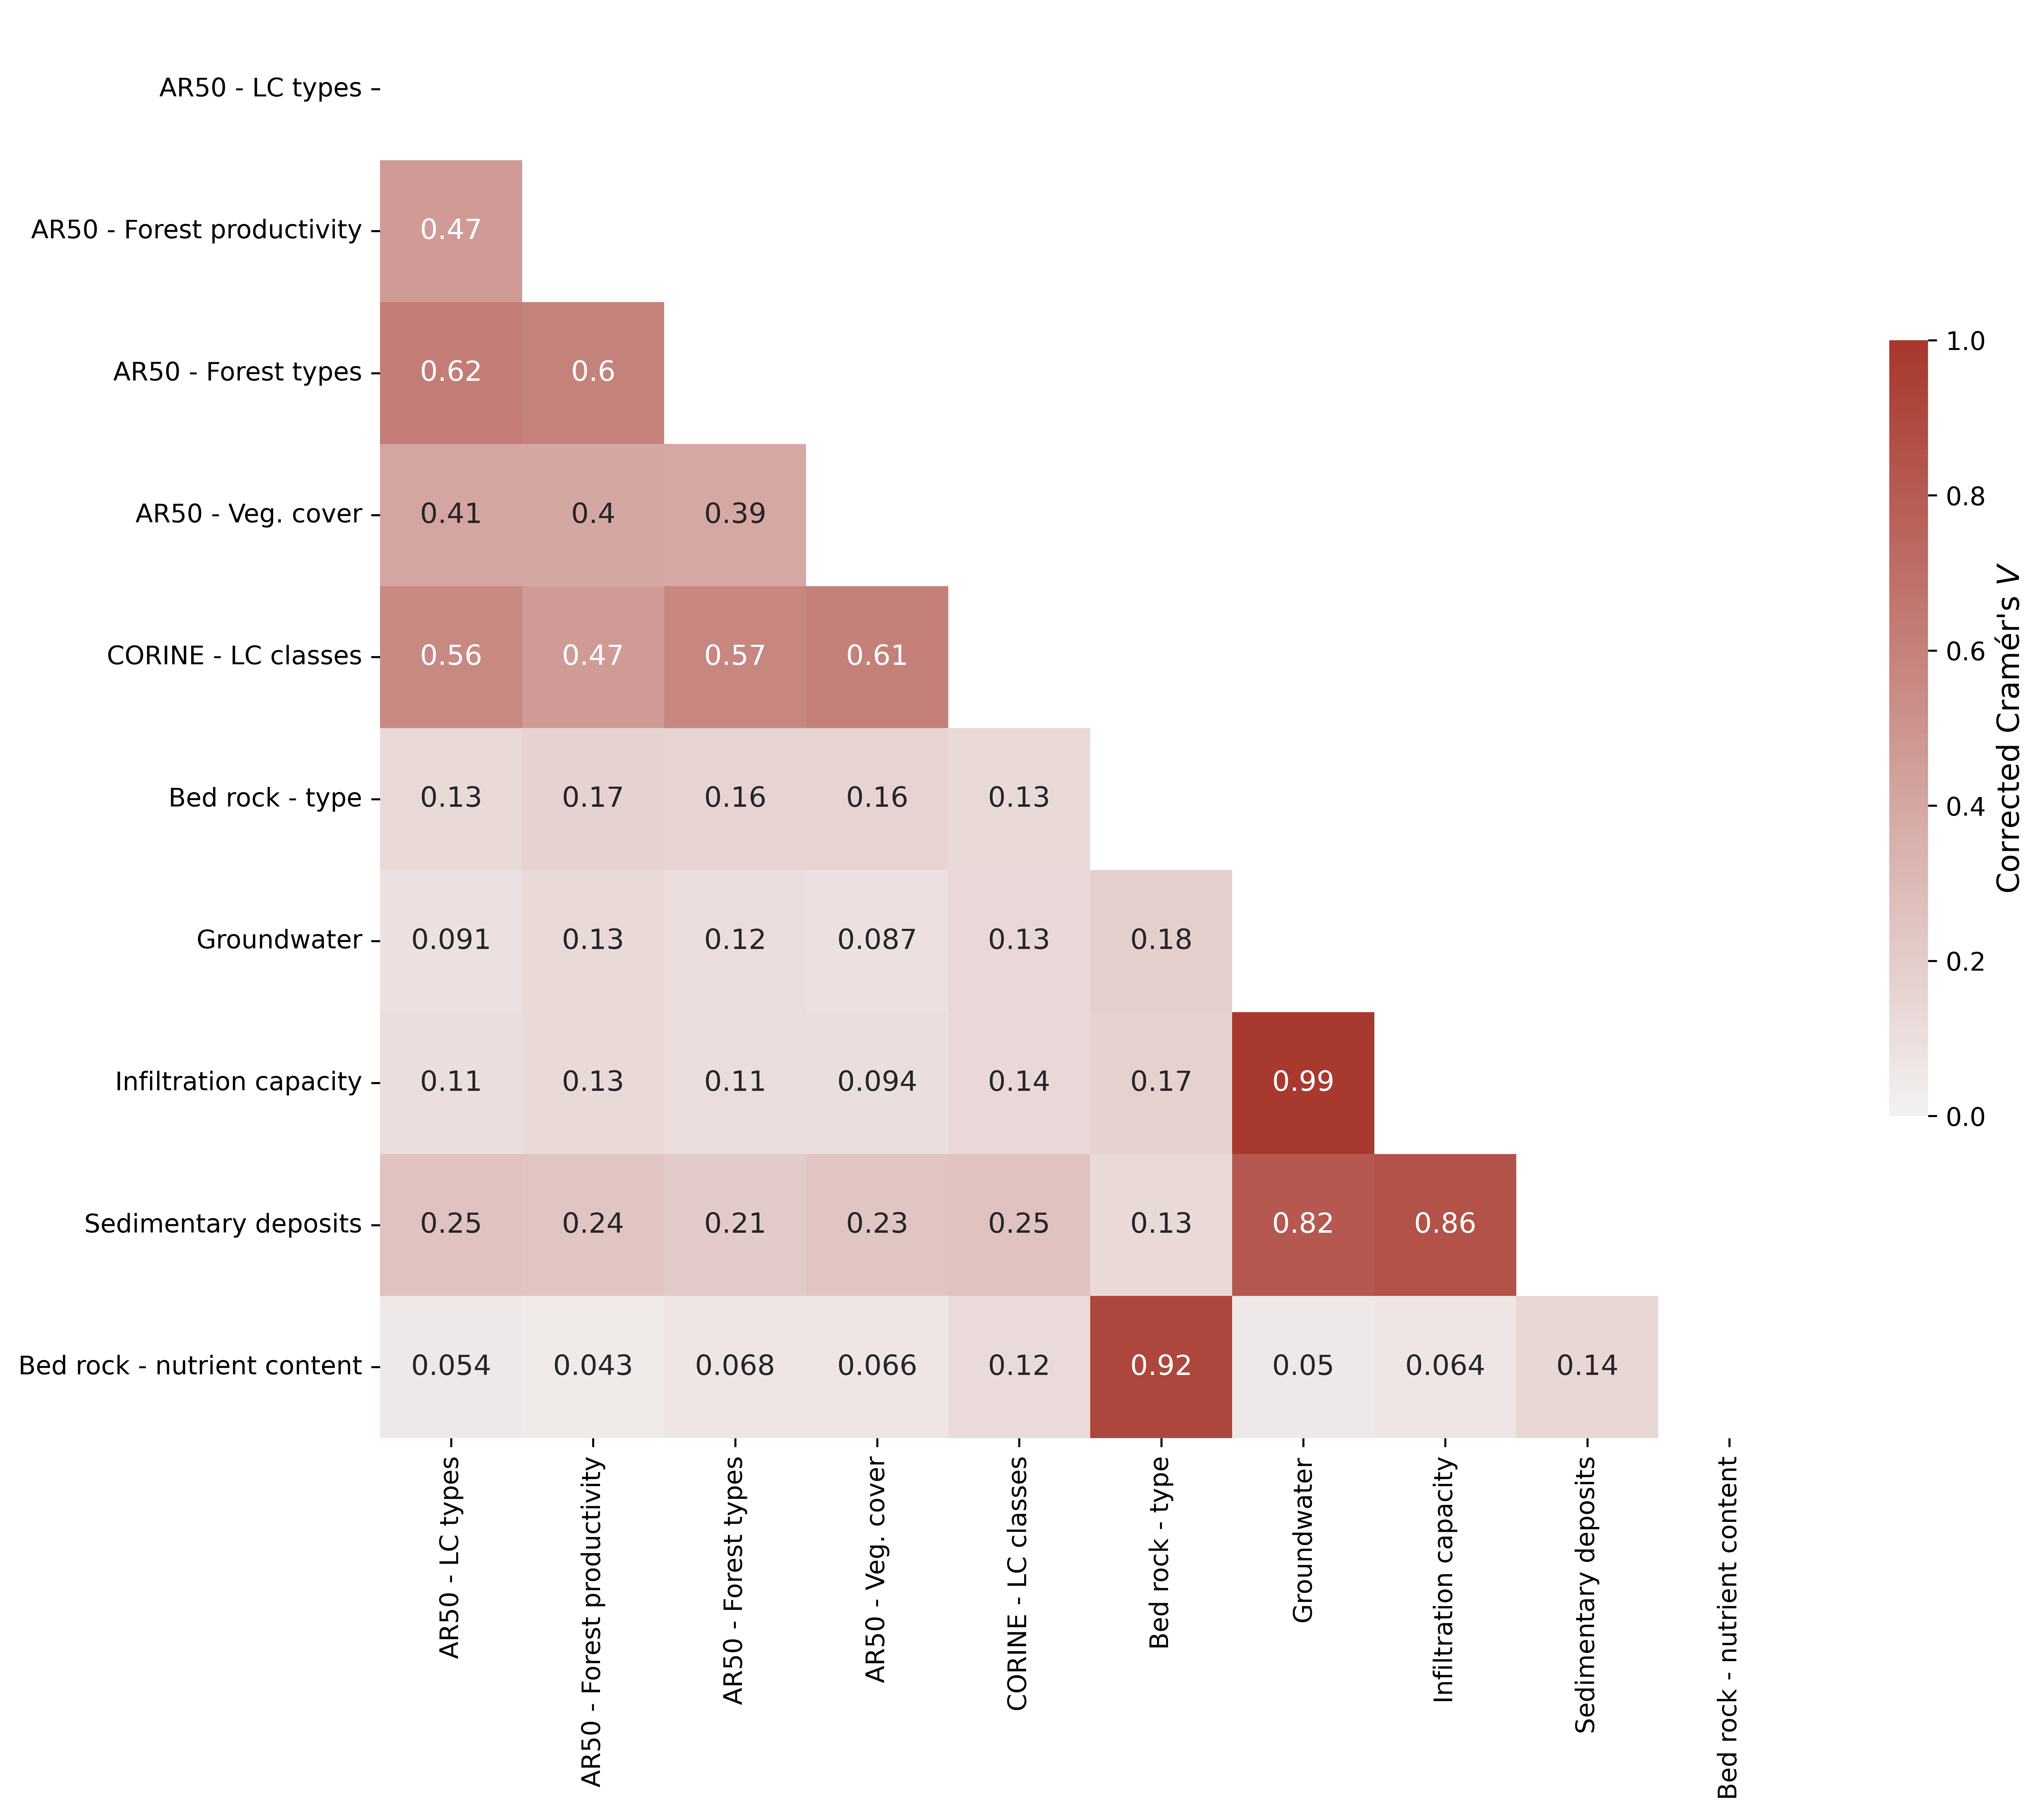

In [78]:
_ = corplt.plot_cramer_heatmap(
    cramers_v_mat.astype(float),
    figsize=(12,12),
    save_as="corrected_cramer_v_heatmap.png"
)

### 2.1 Use clustering to reduce amount of features
Use Ward's method to form feature clusters, calculate permutation importance for full data set, only keep most important feature of each cluster.

In [ ]:
from scipy.stats import spearmanr

feat_cor_spear = spearmanr(vt_X_cont_norm).correlation

In [ ]:
print(len(vt_X_cont.columns))

In [ ]:
from collections import defaultdict
'''
cluster_id_to_feature_ids contains clusters of correlated variables as seperate lists.
The size of lists is determined by "t", the second input of hierarchy.fcluster.
Higher t --> higher absolute correlation required to end up in same list
'''
crit = 'distance'
threshold = 0.7

cluster_ids = hierarchy.fcluster(Z=feat_corr_linkage, t=0.7, criterion=crit)
cluster_id_to_feature_ids = defaultdict(list)

for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)

sample_features = [v[0] for v in cluster_id_to_feature_ids.values()]

In [ ]:
### How many features does this result in?
len(sample_features)

In [ ]:
### Manually select most important features in each cluster based on highest feature importance w/ full set
bestacc_importances = pd.read_csv('../results/tables/bestacc_mean_decrease_impurity.csv',index_col=0)

In [ ]:
bestacc_importances.head()

In [ ]:
bestacc_importances.index

In [ ]:
### Initialize DataFrame for reduced indices
vt_X_reduced = pd.DataFrame()

for cluster_idx,members in cluster_id_to_feature_ids.items():
    ### Extract importance values of current cluster
    cur_alldatavimps_in_cluster = bestacc_importances.loc[list(vt_X_cont.columns[members].values),"mean_decrease_impurity"]
    
    ### Determine highest importance value in cluster
    max_vimp_feature = cur_alldatavimps_in_cluster.idxmax
    
    ### Select column and add to pruned DataFrame
    vt_X_reduced[max_vimp_feature] = vt_X_fit[max_vimp_feature]

In [ ]:
print(vt_X_reduced.shape)
print(vt_X_reduced.columns)
vt_X_reduced.head()

In [ ]:
cluster_ids

In [ ]:
### Save formed clusters in table
vt_X_reduced.linkage_method = 'Ward.s_linkage'
vt_X_reduced.criterion = crit
vt_X_reduced.threshold = threshold

In [ ]:
vt_X_reduced.shape

In [ ]:
### Save as csv
#vt_X_reduced.to_csv("../results/tables/var_correlation/cont_pruned_vars_ward_t"+str(threshold)+"_crit-"+str(crit)+".csv", index=False)
### And as a pickle
vt_X_reduced.to_pickle("../results/pickles/var_correlation/cont_pruned_vars_ward_t"+str(threshold)+"_crit-"+str(crit)+".pkl")

---
# Read in for testing

In [ ]:
import pandas as pd
vt_X_reduced = pd.read_pickle("../results/pickles/var_correlation/cont_pruned_vars_ward_t0.7_crit-distance.pkl")
print(len(vt_X_reduced.columns))